In [1]:
import ROOT

import numpy as np
import pickle
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"

ok!


In [2]:
# load the dictionary with all trained models
where_models = '/home/micael/MyWorkspace/DATA/NN_outputs'
modelos_comPtRel = pickle.load(open(where_models+'/'+'Estimadores_comPTREL.pkl'))
modelos_semPtRel = pickle.load(open(where_models+'/'+'Estimadores_semPTREL.pkl'))

trn_desc_comPtRel = pickle.load(open(where_models+'/'+'Trn_desc_comPTREL.pkl'))
trn_desc_semPtRel = pickle.load(open(where_models+'/'+'Trn_desc_semPTREL.pkl'))

save_figures = '/home/micael/MyWorkspace/DATA/trabalho_CPE721'

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


# Plot the error - Models with PtRel

In [3]:
models = np.array([1,2,3,4,5,6,7,8,9,10])

In [4]:
np.zeros([10])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
erro_medio_por_modelo = np.zeros([len(trn_desc_comPtRel)])
desvio_por_modelo = np.zeros([len(trn_desc_comPtRel)])

erro_medio_por_modelo_treinamento = np.zeros([len(trn_desc_comPtRel)])
desvio_por_modelo_treinamento = np.zeros([len(trn_desc_comPtRel)])

for imodel in range(len(trn_desc_comPtRel)):
    erro_medio_por_modelo[imodel] = np.mean(trn_desc_comPtRel[imodel].history['val_loss'])
    desvio_por_modelo[imodel]= np.sqrt(np.var(trn_desc_comPtRel[imodel].history['val_loss'],dtype=np.float64),dtype=np.float64)
    
    erro_medio_por_modelo_treinamento[imodel] = np.mean(trn_desc_comPtRel[imodel].history['loss'])
    desvio_por_modelo_treinamento[imodel]= np.sqrt(np.var(trn_desc_comPtRel[imodel].history['loss'],dtype=np.float64),dtype=np.float64)

In [6]:
erro_medio_por_modelo,desvio_por_modelo

(array([ 0.04871756,  0.04840862,  0.05361613,  0.04064446,  0.05345456,
         0.05306541,  0.05199552,  0.05012859,  0.05069851,  0.05014916]),
 array([ 0.00117163,  0.00131196,  0.00163265,  0.00105144,  0.00136313,
         0.00138387,  0.00133431,  0.00138821,  0.00116141,  0.00136554]))

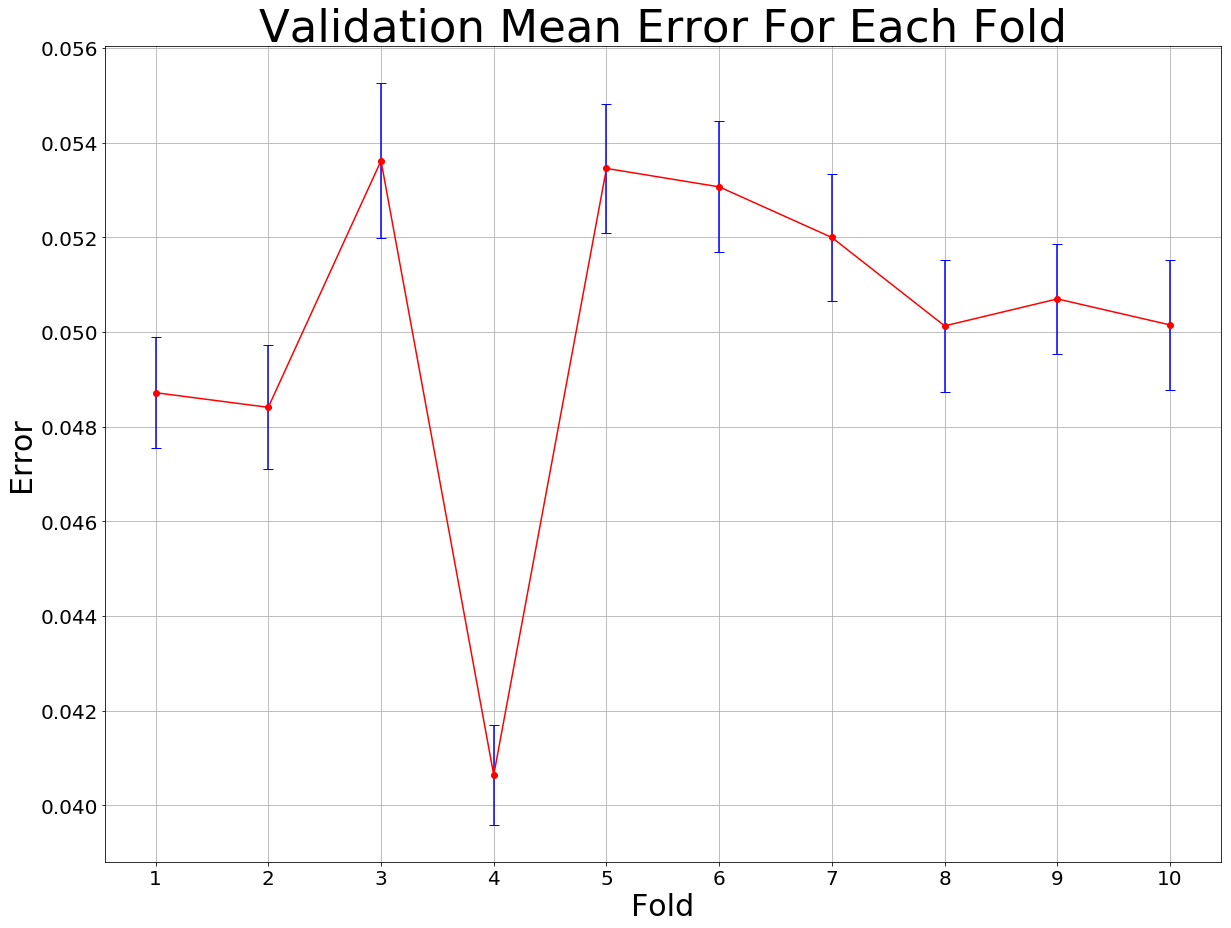

In [7]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo,yerr=desvio_por_modelo,color='r',ecolor='b',fmt='-o',capsize=5)

plt.title('Validation Mean Error For Each Fold',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Fold',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'validation_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_mean_error_10Folds.pdf')
plt.show()  
             

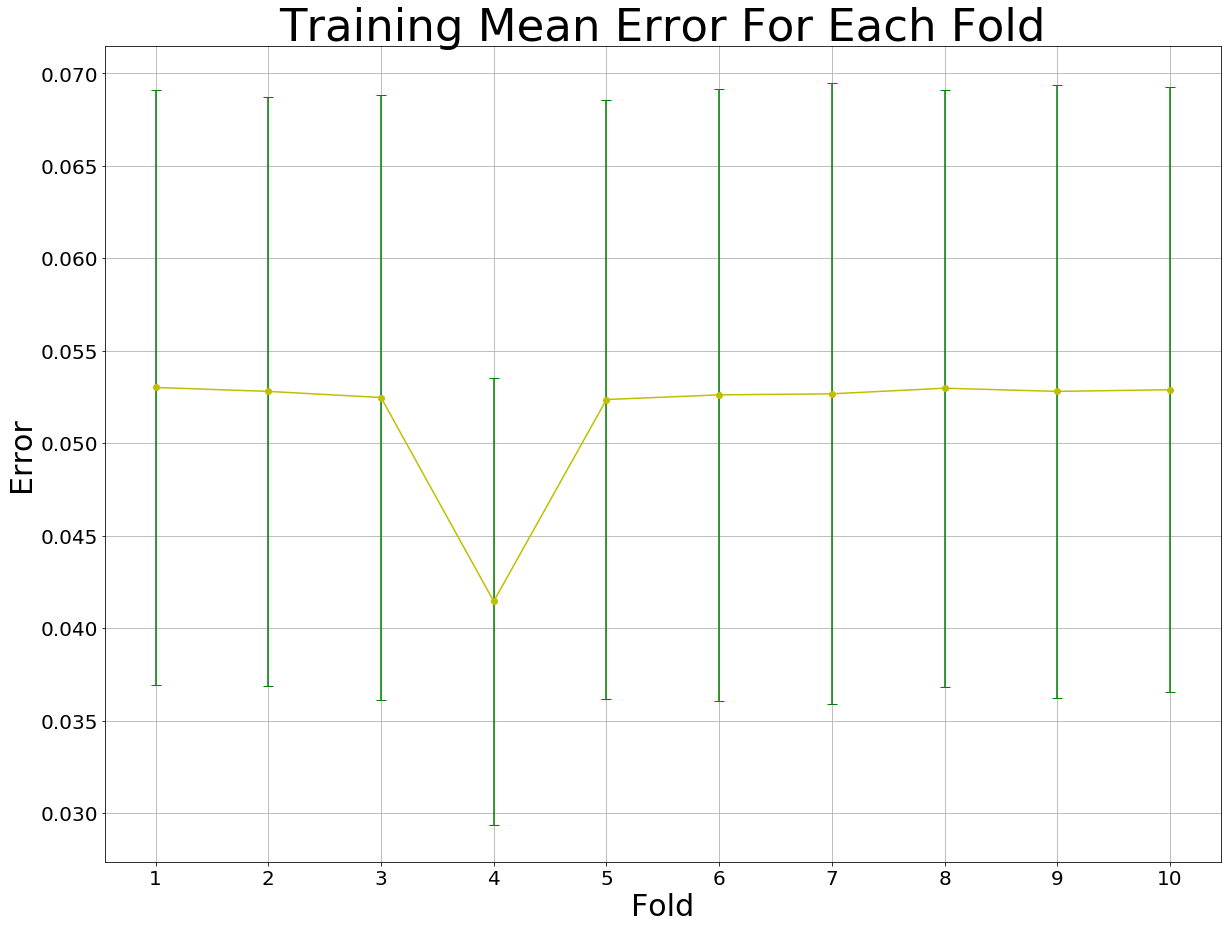

In [8]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_treinamento,yerr=desvio_por_modelo_treinamento,color='y',ecolor='g',fmt='-o',capsize=5)

plt.title('Training Mean Error For Each Fold',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Fold',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'training_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_mean_error_10Folds.pdf')
plt.show()  
           

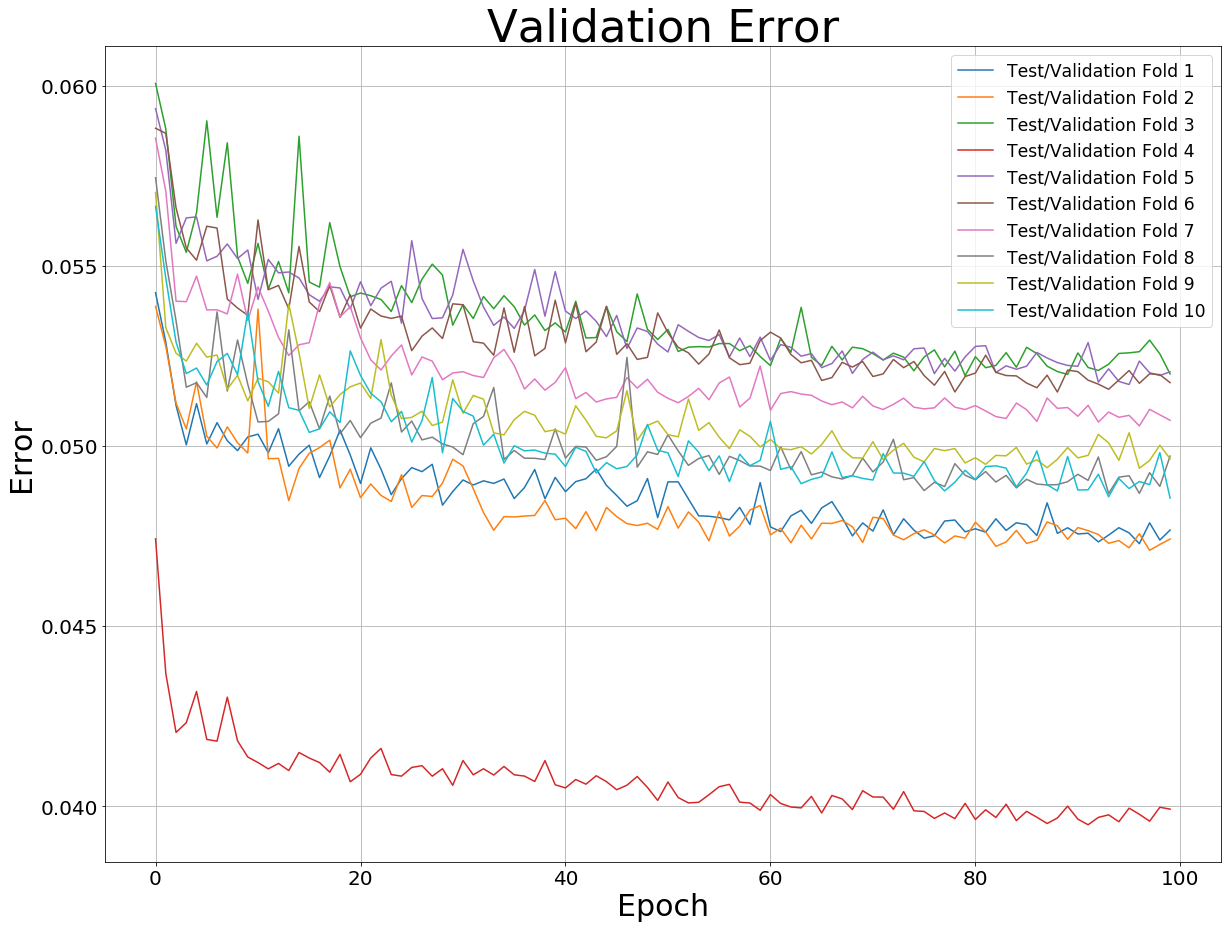

In [10]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_comPtRel)):
    plt.plot(trn_desc_comPtRel[i].history['val_loss'])
    list_t.append('Test/Validation Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Validation Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'validation_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_error_10Folds.pdf')
plt.show()


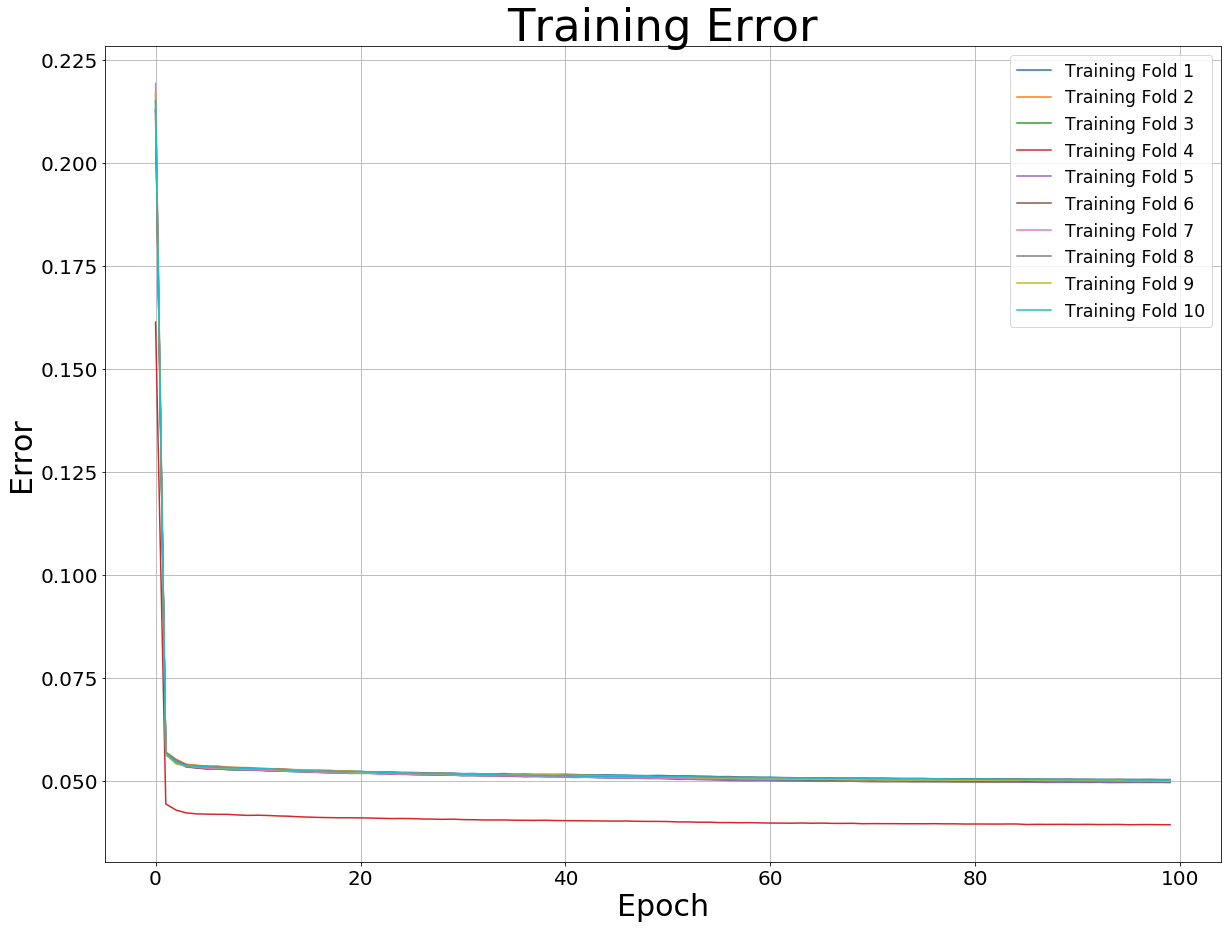

In [11]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_comPtRel)):
    plt.plot(trn_desc_comPtRel[i].history['loss'])
    list_t.append('Training Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Training Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'training_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_error_10Folds.pdf')
plt.show()

# Plot the error - Models without PtRel

In [4]:
erro_medio_por_modelo_semptrel = np.zeros([len(trn_desc_semPtRel)])
desvio_por_modelo_semptrel = np.zeros([len(trn_desc_semPtRel)])

erro_medio_por_modelo_treinamento_semptrel = np.zeros([len(trn_desc_semPtRel)])
desvio_por_modelo_treinamento_semptrel = np.zeros([len(trn_desc_semPtRel)])

for imodel in range(len(trn_desc_semPtRel)):
    erro_medio_por_modelo_semptrel[imodel] = np.mean(trn_desc_semPtRel[imodel].history['val_loss'])
    desvio_por_modelo_semptrel[imodel]= np.sqrt(np.var(trn_desc_semPtRel[imodel].history['val_loss'],dtype=np.float64),dtype=np.float64)
    
    erro_medio_por_modelo_treinamento_semptrel[imodel] = np.mean(trn_desc_semPtRel[imodel].history['loss'])
    desvio_por_modelo_treinamento_semptrel[imodel]= np.sqrt(np.var(trn_desc_semPtRel[imodel].history['loss'],dtype=np.float64),dtype=np.float64)

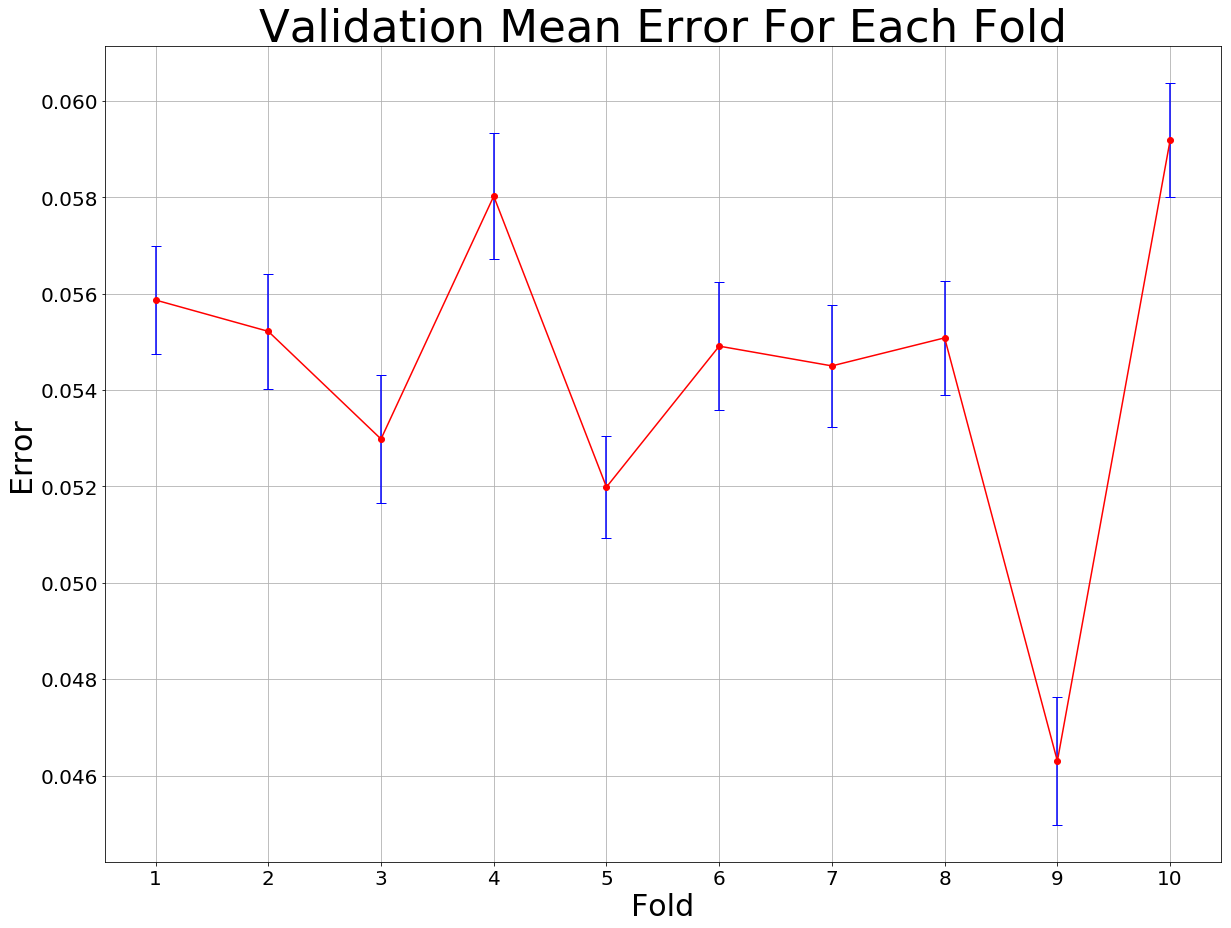

In [5]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_semptrel,yerr=desvio_por_modelo_semptrel,color='r',ecolor='b',fmt='-o',capsize=5)

plt.title('Validation Mean Error For Each Fold',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Fold',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'validation_semptrel_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_semptrel_mean_error_10Folds.pdf')
plt.show()  
       

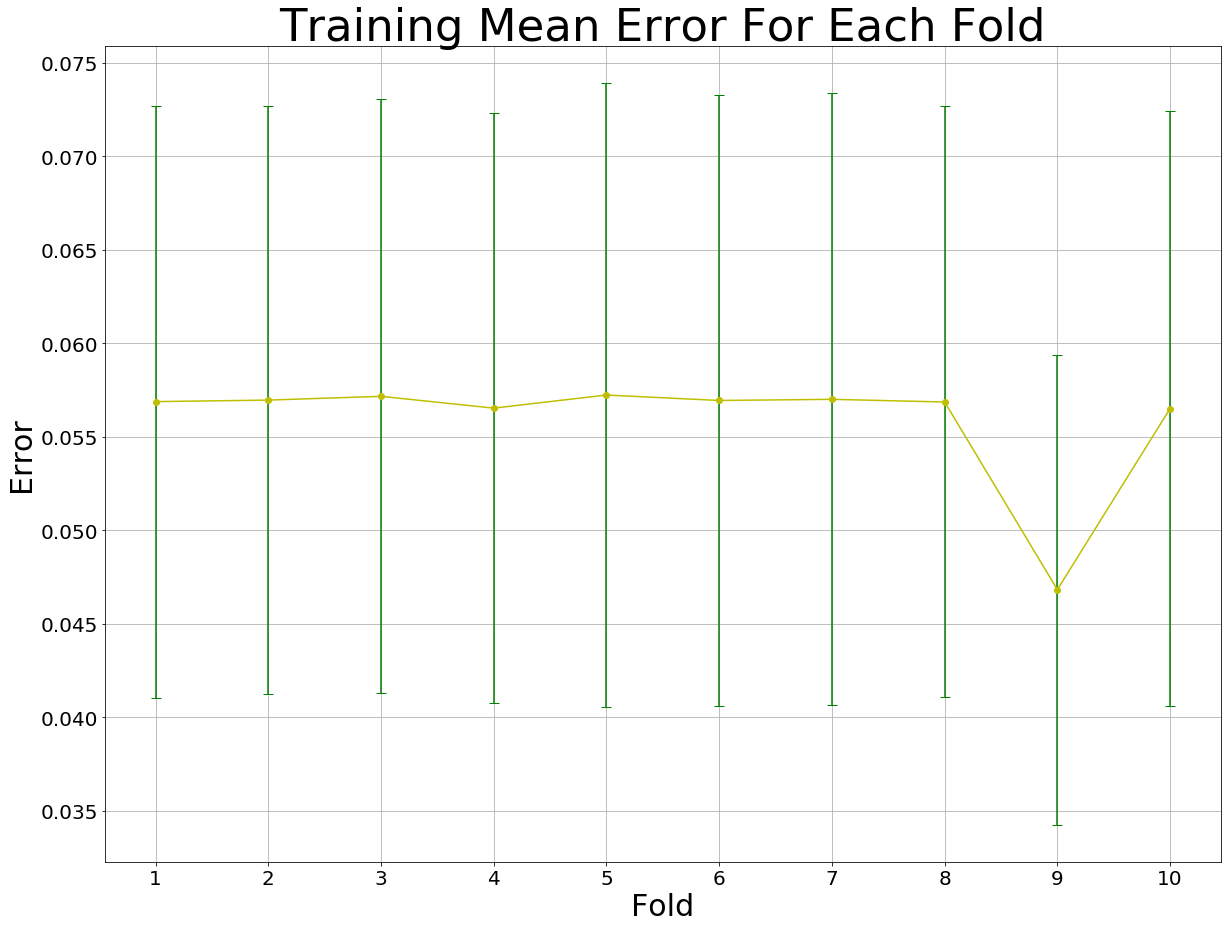

In [6]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_treinamento_semptrel,yerr=desvio_por_modelo_treinamento_semptrel,color='y',ecolor='g',fmt='-o',capsize=5)

plt.title('Training Mean Error For Each Fold',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Fold',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'training_semptrel_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_semptrel_mean_error_10Folds.pdf')
plt.show()  
         

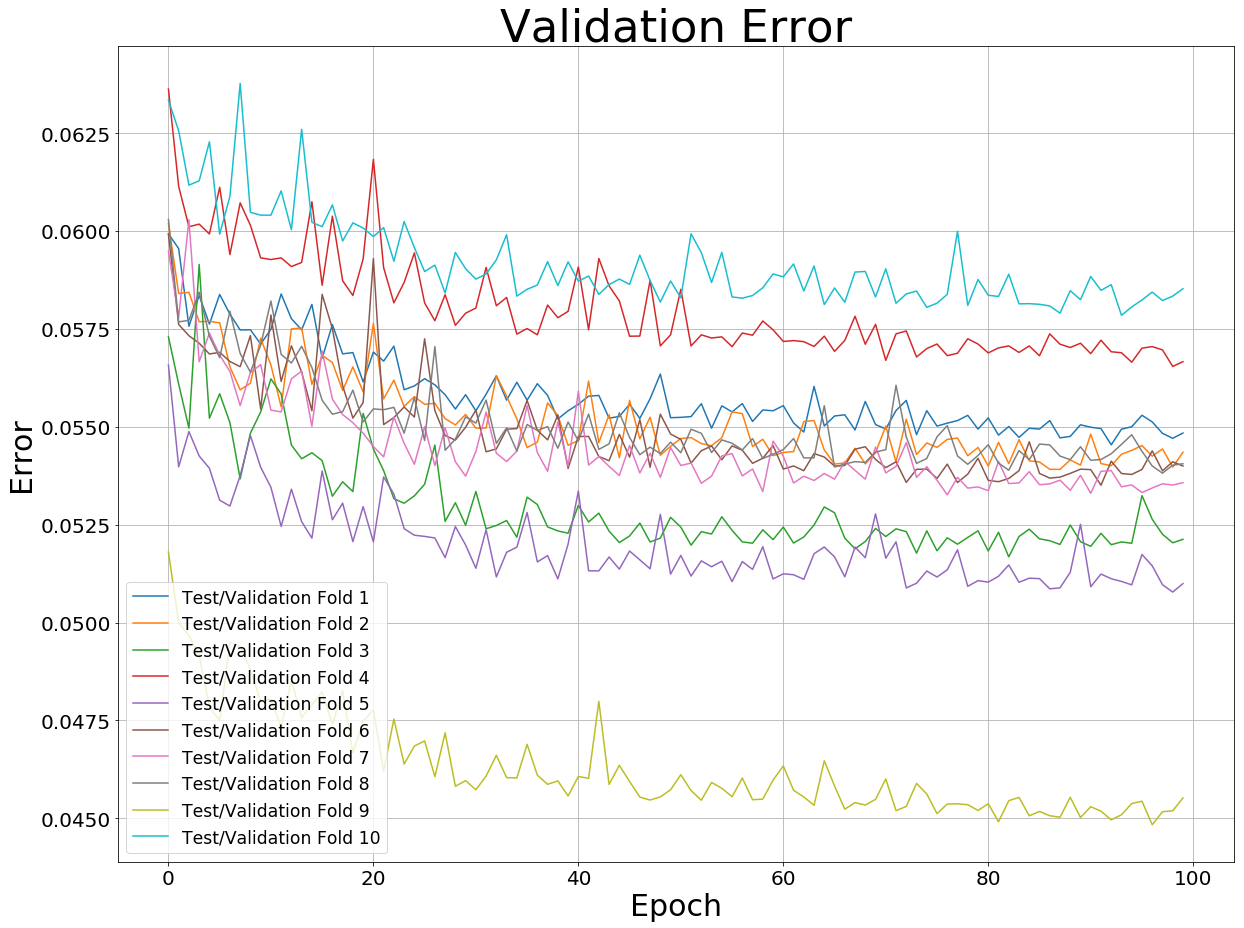

In [7]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_semPtRel)):
    plt.plot(trn_desc_semPtRel[i].history['val_loss'])
    list_t.append('Test/Validation Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Validation Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'validation_semptrel_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_semptrel_error_10Folds.pdf')
plt.show()

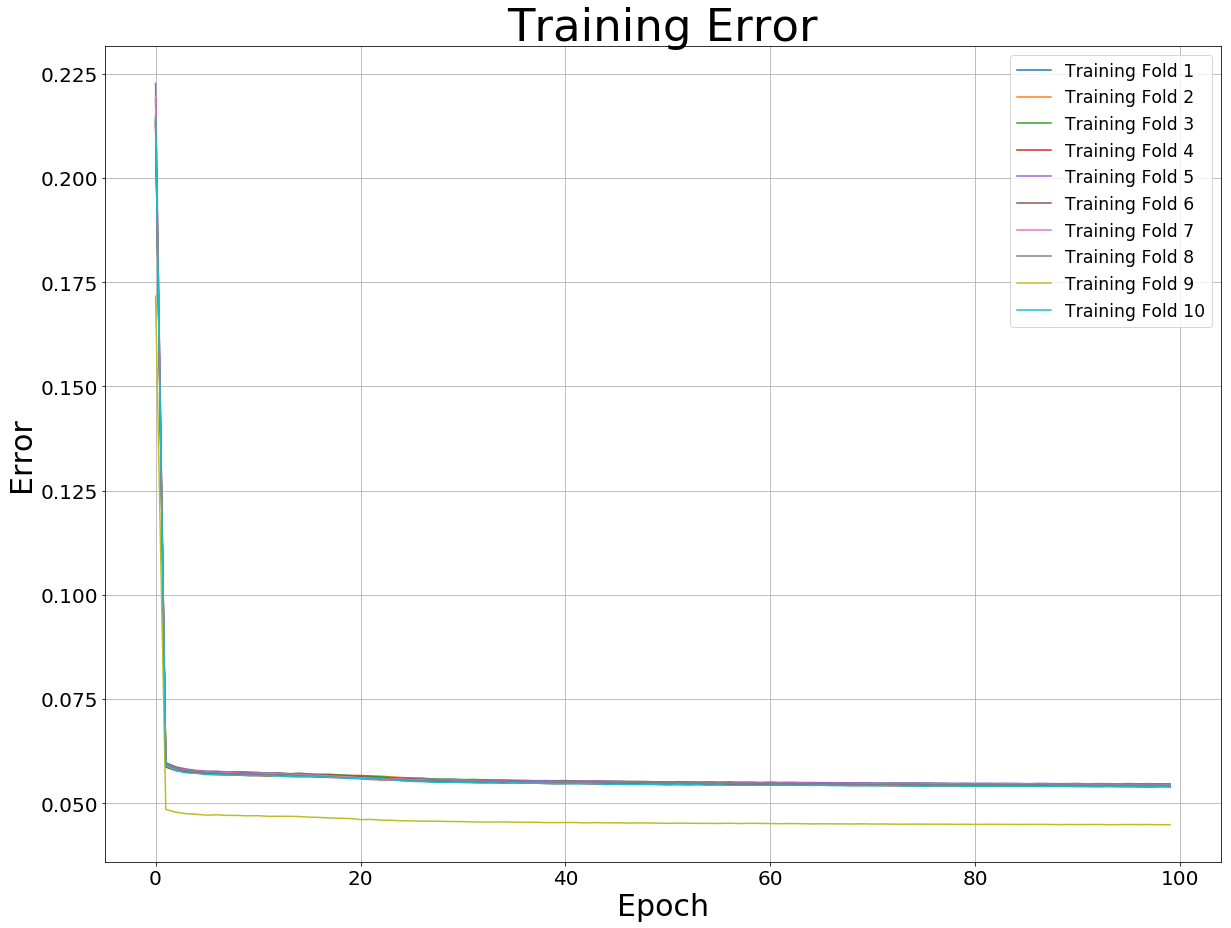

In [8]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_semPtRel)):
    plt.plot(trn_desc_semPtRel[i].history['loss'])
    list_t.append('Training Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Training Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'training_semptrel_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_semptrel_error_10Folds.pdf')
plt.show()

# Mass Reconstruction  

In [9]:

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
list_color.append(ROOT.kGreen)
#test two models
list_color.append(ROOT.kMagenta)
#list_color.append(ROOT.kRed+2)
#list_color.append(ROOT.kRed+3)
#list_color.append(ROOT.kRed+4)
#end list of colors

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Mass ","h_lvbb_M_truth",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reco Mass ","h_lvbb_M_reco",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("NN Mass ","h_lvbb_M_NN",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("NNnoPtRel Mass ","h_lvbb_M_NNnoPtRel",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)

c = rootnotes.canvas("c", (800, 600))

list_hist_M

[<ROOT.TH1F object ("h_lvbb_M_truth") at 0x1d42ec90>,
 <ROOT.TH1F object ("h_lvbb_M_reco") at 0x19ded450>,
 <ROOT.TH1F object ("h_lvbb_M_NN") at 0x18942690>,
 <ROOT.TH1F object ("h_lvbb_M_NNnoPtRel") at 0x1d808800>]

In [10]:
# Confirm our array shape
path = "/home/micael/MyWorkspace/DATA"
data = np.load(path+"/"+"lvbb125Array.npy")
data_target = data[:,[12]]

data_inputs = data[:,:12]
data_inputs_noPtRel = data[:,:11]
print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [11]:
from sklearn.model_selection import KFold
from sklearn import preprocessing

n_folds = int(10)
#n_samples =  int(0.1*data_target.shape[0])
n_inits = 5
norm = 'mapstd'

kf = KFold(n_splits=n_folds,shuffle=True)
CVO = list(kf.split(data_target))

# Train information 
#n_folds = 2
#n_inits = 1
#norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}
estimator = {}

# Isto deve estar dentro do primeiro 'for'. dessa maneira meu conjuto de treino e validação são os mesmo em todos os folds.

MOP_list = []                           
for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
        scaler_noPtRel = preprocessing.StandardScaler().fit(data_inputs_noPtRel[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    # Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id,:],
             bins=np.linspace(data_target[train_id,:].min(),data_target[train_id,:].max(),50))

    MOP = target_values[np.argmax(freq)]
    MOP_list.append(MOP)
    print 'Fold',ifold, 'MOP=', MOP

Fold 0 MOP= 46.7099231306
Fold 1 MOP= 52.6052574936
Fold 2 MOP= 46.6801470424
Fold 3 MOP= 46.6801470424
Fold 4 MOP= 46.6801470424
Fold 5 MOP= 46.6801470424
Fold 6 MOP= 46.6801470424
Fold 7 MOP= 46.6801470424
Fold 8 MOP= 46.6801470424
Fold 9 MOP= 46.6801470424


In [12]:
MOP_list

[46.709923130580357,
 52.605257493622446,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724]

In [13]:
# Confirm our array shape
root_file_path = "/home/micael/MyWorkspace/DATA"
data_input = root_file_path+"/"+"lvbb125.root"
treeName = "perevent"
file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)
nrEvents = tree.GetEntries()
print nrEvents

95550


In [45]:
for i in 

In [14]:
choose_fold = 0
model = modelos_comPtRel[choose_fold]
modelNOPTREL = modelos_semPtRel[choose_fold]
model

In [59]:
for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            break
    # ==== Trtuh ======== #  
    j1Truth_LV = ROOT.TLorentzVector()
    j2Truth_LV = ROOT.TLorentzVector()
        
    j1Truth_pt = tree.j1_GENWZ_Pt
    j1Truth_phi = tree.j1_GENWZ_Phi
    j1Truth_eta = tree.j1_GENWZ_Eta
    j1Truth_e = tree.j1_GENWZ_E
        
    j2Truth_pt = tree.j2_GENWZ_Pt
    j2Truth_phi = tree.j2_GENWZ_Phi
    j2Truth_eta = tree.j2_GENWZ_Eta
    j2Truth_e = tree.j2_GENWZ_E
            
    j1Truth_LV.SetPtEtaPhiE(j1Truth_pt,j1Truth_eta,j1Truth_phi,j1Truth_e)
    j2Truth_LV.SetPtEtaPhiE(j2Truth_pt,j2Truth_eta,j2Truth_phi,j2Truth_e)
            
    dijetTruth_LV = j1Truth_LV + j2Truth_LV
    MassTruth = dijetTruth_LV.M()
            
    #====== Reco =========
    j1Reco_LV = ROOT.TLorentzVector()
    j2Reco_LV = ROOT.TLorentzVector()
        
    j1_pt = tree.j1_EMJESGSCMu_Pt
    j1_phi = tree.j1_EMJESGSCMu_Phi
    j1_eta = tree.j1_EMJESGSCMu_Eta
    j1_e = tree.j1_EMJESGSCMu_E
            
    j2_pt = tree.j2_EMJESGSCMu_Pt
    j2_phi = tree.j2_EMJESGSCMu_Phi
    j2_eta = tree.j2_EMJESGSCMu_Eta
    j2_e = tree.j2_EMJESGSCMu_E
            
    j1Reco_LV.SetPtEtaPhiE(j1_pt,j1_eta,j1_phi,j1_e)
    j2Reco_LV.SetPtEtaPhiE(j2_pt,j2_eta,j2_phi,j2_e)
            
    dijetReco_LV = j1Reco_LV + j2Reco_LV
    MassReco = dijetReco_LV.M()
        
    #========= NN =========
            
    j1_LV = ROOT.TLorentzVector()
    j2_LV = ROOT.TLorentzVector()
        
    j1_LVnoPtRel = ROOT.TLorentzVector()
    j2_LVnoPtRel = ROOT.TLorentzVector()
            
    #=============================================================================
    #=======================EMJESGSCMu========================================
    # variables for EMJESGSCMu j1.     
    E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
    Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
    Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
    Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
    # variables for EMJESGSCMu j2.     
    E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
    Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
    Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
    Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
    # PtRel in EMJESGSCMu
    Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
    Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
    norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)

    Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
    Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
    norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
    # sum of components.
    Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
    norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
    numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
    angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
    #compute Relative Pt
    PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
    j1_FracEM3 = tree.j1_FracEM3
    j1_FracTile0 = tree.j1_FracTile0
    j1_TrkWidth = tree.j1_TrkWidth
    j1_EMF = tree.j1_EMF
    j1_JVF = tree.j1_JVF
    j1_NTrk = tree.j1_NTrk 
    j1_SumPtTrk = tree.j1_SumPtTrk
            # only for EM and j2.
    j2_FracEM3 = tree.j2_FracEM3
    j2_FracTile0 = tree.j2_FracTile0
    j2_TrkWidth = tree.j2_TrkWidth
    j2_EMF = tree.j2_EMF
    j2_JVF = tree.j2_JVF
    j2_NTrk = tree.j2_NTrk 
    j2_SumPtTrk = tree.j2_SumPtTrk
    
    # Create a numpy array with all data and normalize then
    # ========= with PtRel =================
    j1 = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
    V_j1 = np.reshape(j1, (1,12))
    norm_j1_data = scaler.transform(V_j1)
            
    j2 = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
    
    V_j2 = np.reshape(j2, (1,12))
    norm_j2_data = scaler.transform(V_j2)
            #print norm_j1_data.shape,norm_j2_data.shape
            # ========= without PtRel ==============
        
    j1noPtRel = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu])
        
    V_j1noPtRel = np.reshape(j1noPtRel, (1,11))
    norm_j1noPtRel_data = scaler_noPtRel.transform(V_j1noPtRel)
            
    j2noPtRel = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu])
        
    V_j2noPtRel = np.reshape(j2noPtRel, (1,11))
    norm_j2noPtRel_data = scaler_noPtRel.transform(V_j2noPtRel)
        
    # ========= end ==========
    # ========= Predict in two models =======
    Pt1_cor = model.predict(norm_j1_data, batch_size=8, verbose=0)*MOP_list[choose_fold]
    Pt2_cor = model.predict(norm_j2_data, batch_size=8, verbose=0)*MOP_list[choose_fold]
        
    Pt1noPtRel_cor = modelNOPTREL.predict(norm_j1noPtRel_data, batch_size=8, verbose=0)*MOP_list[choose_fold]
    Pt2noPtRel_cor = modelNOPTREL.predict(norm_j2noPtRel_data, batch_size=8, verbose=0)*MOP_list[choose_fold]
        
    # ========== end ==========
    # ========== Set the LorentzVectors ============
        
    j1_LV.SetPtEtaPhiE((Pt1_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
    j2_LV.SetPtEtaPhiE((Pt2_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
    # ========= Without PtRel =============
        
    j1_LVnoPtRel.SetPtEtaPhiE((Pt1noPtRel_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                   Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1noPtRel_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
    j2_LVnoPtRel.SetPtEtaPhiE((Pt2noPtRel_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                   Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2noPtRel_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
    # ========= end ===============
    # ========= extract the dijet Mass ==========
        
    dijet_LV = j1_LV + j2_LV
    MassNN = dijet_LV.M()
    
    dijet_LVnoPtRel = j1_LVnoPtRel + j2_LVnoPtRel
    MassNNnoPtRel = dijet_LVnoPtRel.M()
    # ========= end ===========
    # ========= Fill the Mass Histogram ======
    list_hist_M[0].Fill(MassTruth)
    list_hist_M[1].Fill(MassReco)
    list_hist_M[2].Fill(MassNN)
    list_hist_M[3].Fill(MassNNnoPtRel)
    
    estimator_j1 = Pt1_cor/Pt1_EMJESGSCMu
    estimator_j2 = Pt2_cor/Pt2_EMJESGSCMu
    estimator_j1noPtRel = Pt1noPtRel_cor/Pt1_EMJESGSCMu
    estimator_j2noPtRel = Pt2noPtRel_cor/Pt2_EMJESGSCMu
    
    dataBuffer2 = np.array([[estimator_j1,estimator_j2]])
    dataBuffer3 = np.array([[estimator_j1noPtRel,estimator_j2noPtRel]])
    dataBuffer = np.array([[MassTruth,MassReco,MassNN,MassNNnoPtRel]])
    if i==0:
        Mass_array = dataBuffer
        Corr_estimator = dataBuffer2
        Corr_estimator_semPtRel = dataBuffer3
    else:
        Mass_array = np.append(Mass_array,dataBuffer, axis=0)
        Corr_estimator = np.append(Corr_estimator,dataBuffer2, axis=0)
        Corr_estimator_semPtRel = np.append(Corr_estimator_semPtRel,dataBuffer3, axis=0)
np.save(save_figures+"/"+"Mass_Matrix",Mass_array)
np.save(save_figures+"/"+"Cor_estimator_Matrix",Corr_estimator)
np.save(save_figures+"/"+"Cor_estimator_semPtRel_Matrix",Corr_estimator_semPtRel)
#clone_list_M = []
#for hist in list_hist_M:
#    newhist = hist.Clone()
#    clone_list_M.append(newhist)
#HistogramFunctions.Draw1DHists(list_hist_M,save_figures)
#HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Mass Plot", " Invariant Mass ", "Events", c)        

#c
Mass_array        

array([[ 124.68336457,  120.91766725,  118.7397128 ,  124.91080702],
       [ 126.20026635,  114.06880198,  121.12136238,  118.44196627],
       [ 123.68706196,  128.27607868,  128.38898906,  132.40347445],
       ..., 
       [ 118.15472856,  132.5047636 ,  128.89573736,  135.34208871],
       [ 118.0836934 ,  124.15523604,  130.35062377,  131.39736639],
       [ 109.88509186,  116.06063119,  115.79745064,  118.82277297]])

In [17]:
c.Print(save_figures+'/'+'Compare_Mass_histogram.png')
c.Print(save_figures+'/'+'Compare_Mass_histogram.pdf')

In [68]:
np.mean(Corr_estimator[:,1]),np.std(Corr_estimator[:,1]),np.mean(Corr_estimator_semPtRel[:,1]),np.std(Corr_estimator_semPtRel[:,1])

(1.0480584, 0.081987105, 1.0514469, 0.056745876)

In [33]:
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis


In [69]:
StatisticalAnalysis.JSDiv(Mass_array.T,Mass_array.T)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

array([[ 0.        ,  0.16386304,  0.12733311,  0.16502617],
       [ 0.16386304,  0.        ,  0.06173729,  0.01846197],
       [ 0.12733311,  0.06173729,  0.        ,  0.06339917],
       [ 0.16502617,  0.01846197,  0.06339917,  0.        ]])

In [70]:
KLs = StatisticalAnalysis.CreateKLsMatrix(Mass_array.T,Mass_array.T)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [71]:
StatisticalAnalysis.SKLDiv(KLs[0],KLs[1])

array([[ 0.        ,  0.25679142,  0.1954596 ,  0.2437334 ],
       [ 0.30460051,  0.        ,  0.120609  ,  0.02863376],
       [ 0.19861685,  0.11105012,  0.        ,  0.1134815 ],
       [ 0.30892493,  0.02844022,  0.12623885,  0.        ]])

In [72]:
KLs[0]

array([[ 0.        ,  0.25679142,  0.1954596 ,  0.2437334 ],
       [ 0.30460051,  0.        ,  0.120609  ,  0.02863376],
       [ 0.19861685,  0.11105012,  0.        ,  0.1134815 ],
       [ 0.30892493,  0.02844022,  0.12623885,  0.        ]])

In [73]:
KLs[1]

array([[ 0.        ,  0.25679142,  0.1954596 ,  0.2437334 ],
       [ 0.30460051,  0.        ,  0.120609  ,  0.02863376],
       [ 0.19861685,  0.11105012,  0.        ,  0.1134815 ],
       [ 0.30892493,  0.02844022,  0.12623885,  0.        ]])

In [75]:
Mass = Mass_array.T

In [104]:
(np.max(Mass[3,:])-np.min(Mass[3,:]))/5

102.38257197897846

In [119]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)
for i in range(Mass.shape[0]):
    hist = TH1D('Invariant Mass', 'Invariant Mass', 109,20,190 )
    root_numpy.fill_hist(hist,Mass[i,:])
    c = rootnotes.canvas("c", (800, 600))
    hist.SetLineWidth(2)
    hist.SetLineColor(list_color[i])
    hist.Draw()

    fit = FitFunctions.fitBukin(hist,90,150,fit_type='')
    fit.SetLineColor(hist.GetLineColor())
    fit.SetLineWidth(2)
    fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
    fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
    fitlabel.AddText("Model: "+fit.GetName().title())
    fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
    fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
    fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
    fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
    fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
    fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
    fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
    fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
    fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
    fitlabel.Draw()
    c.Print(save_figures+'/'+'FitBukin'+str(i)+'.png')
    c.Print(save_figures+'/'+'FitBukin'+str(i)+'.pdf')
    c


TFile::Append:0: RuntimeWarning: Replacing existing TH1: Invariant Mass (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: Invariant Mass (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: Invariant Mass (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: Invariant Mass (Potential memory leak).
